In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [4]:
train_labels[0]

1

In [5]:
len(train_labels)

25000

In [6]:
len(train_labels)

25000

In [7]:
test_labels[0]

0

In [8]:
max([max(sequence) for sequence in test_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

DATA PREPARATION 

In [11]:

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [12]:
#Data Vectorization 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
#label vectorization
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [16]:
#Building model using relu and compiling it
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5222 - accuracy: 0.7743 - val_loss: 0.3908 - val_accuracy: 0.8688
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3185 - accuracy: 0.8998 - val_loss: 0.3149 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2408 - accuracy: 0.9193 - val_loss: 0.3077 - val_accuracy: 0.8739
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1905 - accuracy: 0.9377 - val_loss: 0.3059 - val_accuracy: 0.8777
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1621 - accuracy: 0.9465 - val_loss: 0.2793 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1378 - accuracy: 0.9557 - val_loss: 0.3008 - val_accuracy: 0.8835
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1180 - accuracy: 0.9635 - val_loss: 0.3364 - val_accuracy: 0.8746
Epoch 8/20
30

The training set resulted in a loss of 0.5371 and an accuracy of 0.7781, whereas the validation set resulted in a loss of 0.4241 and an accuracy of 0.8535.
By the end of the 20th epoch, the model had a loss of 0.0175 and an accuracy of 0.9976. The model's accuracy and loss on the training set rose as the training went on. By the time the validation set's twentieth epoch came to a conclusion, the model's accuracy was 0.8684 and its loss was 0.5515. The training data set is overfitted by the model.

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

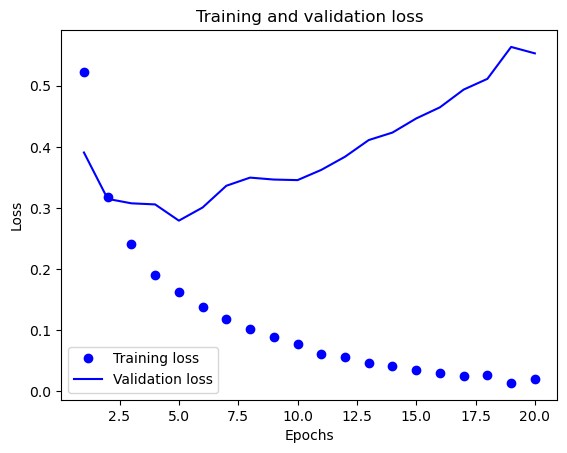

In [21]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

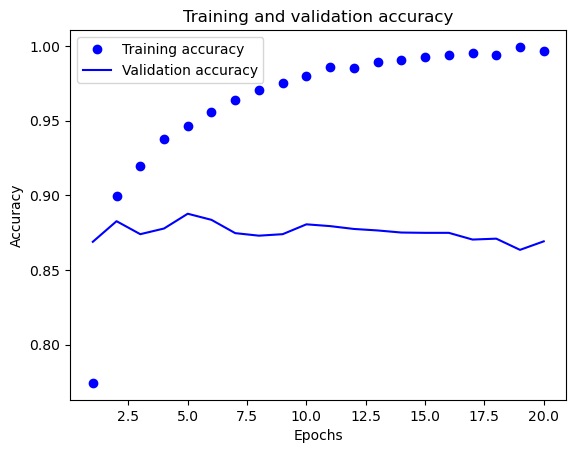

In [22]:
#Plotting training accuracy vs validatition accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

It could need more investigation to enhance the model's performance, such as modifying the hyperparameters or applying regularization strategies.

Model retraining

In [23]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4918 - accuracy: 0.8069
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2897 - accuracy: 0.8973
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2256 - accuracy: 0.9177
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2821 - accuracy: 0.8871


In [24]:
results


[0.2821362614631653, 0.8870800137519836]

#accuracy of 88% on the test dataset. The loss value test is 0.2828.

In [25]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.24551705],
       [0.9998213 ],
       [0.93553644],
       ...,
       [0.0923188 ],
       [0.09880689],
       [0.65196645]], dtype=float32)

Constructing a neural network with 1- hidden layer

In [26]:

model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val1 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val1 = y_train[:10000]
partial_y_train = y_train[10000:]


history1_layer = model_1_layer.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val1, y_val1))

Epoch 1/20
30/30 [==============================] - 2s 64ms/step - loss: 0.4978 - accuracy: 0.7881 - val_loss: 0.3881 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3240 - accuracy: 0.8969 - val_loss: 0.3212 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2563 - accuracy: 0.9203 - val_loss: 0.2923 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2161 - accuracy: 0.9316 - val_loss: 0.2979 - val_accuracy: 0.8793
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1885 - accuracy: 0.9404 - val_loss: 0.2748 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1687 - accuracy: 0.9483 - val_loss: 0.2749 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1511 - accuracy: 0.9531 - val_loss: 0.2825 - val_accuracy: 0.8865
Epoch 8/20
30

In [27]:
history_dict1 = history1_layer.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

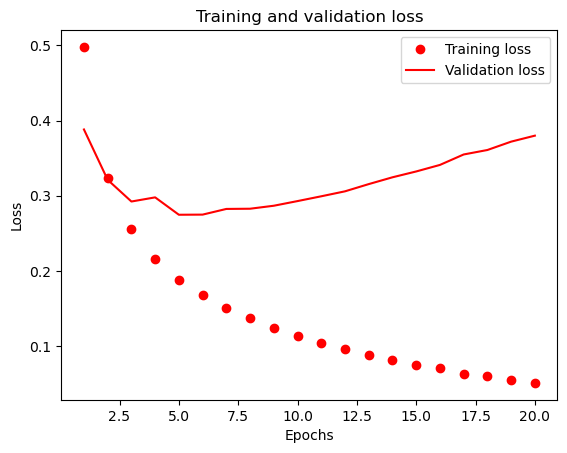

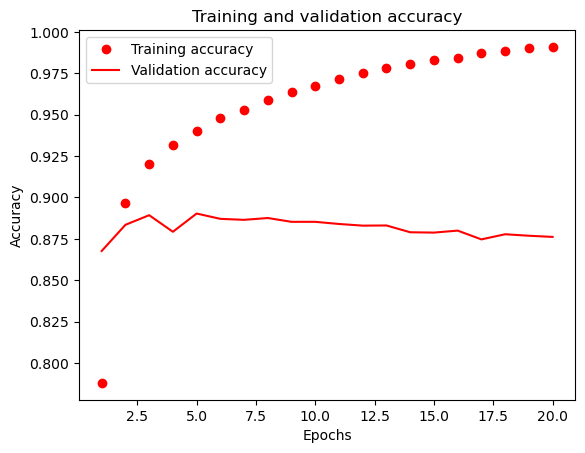

In [28]:
import matplotlib.pyplot as plt
history_dict1 = history1_layer.history
loss_value1 = history_dict1["loss"]
val_loss_value1 = history_dict1["val_loss"]
epochs1 = range(1, len(loss_value1) + 1)

#Plotting graph of Training and Validation loss
plt.plot(epochs1, loss_value1, "ro", label="Training loss")
plt.plot(epochs1, val_loss_value1, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph of Training and Validation Accuracy
plt.clf()
accuracy1 = history_dict1["accuracy"]
val_accuracy1 = history_dict1["val_accuracy"]
plt.plot(epochs1, accuracy1, "ro", label="Training accuracy")
plt.plot(epochs1, val_accuracy1, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
model_1_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_layer.fit(x_train, y_train, epochs=5, batch_size=512)
result_1_layer = model_1_layer.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 9ms/step - loss: 0.4555 - accuracy: 0.8140
Epoch 2/5
49/49 [==============================] - 0s 9ms/step - loss: 0.2835 - accuracy: 0.9050
Epoch 3/5
49/49 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.9186
Epoch 4/5
49/49 [==============================] - 0s 8ms/step - loss: 0.1998 - accuracy: 0.9308
Epoch 5/5
782/782 [==============================] - 1s 2ms/step - loss: 0.2824 - accuracy: 0.8867


In [30]:
print(result_1_layer)

#The loss on the test set is 0.2778, and the accuracy is 88.85%.

[0.282381534576416, 0.886680006980896]


In [31]:
model_1_layer.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.23958986],
       [0.9996769 ],
       [0.87091583],
       ...,
       [0.13240184],
       [0.09955145],
       [0.6155348 ]], dtype=float32)

#Building a neural network with 3 hidden layers

In [32]:

model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val3 = y_train[:10000]
partial_y_train = y_train[10000:]

history_3_layers = model_3_layers.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3, y_val3))

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5763 - accuracy: 0.7433 - val_loss: 0.4624 - val_accuracy: 0.8484
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3771 - accuracy: 0.8876 - val_loss: 0.3654 - val_accuracy: 0.8591
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2655 - accuracy: 0.9187 - val_loss: 0.3098 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2074 - accuracy: 0.9339 - val_loss: 0.3059 - val_accuracy: 0.8739
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1613 - accuracy: 0.9477 - val_loss: 0.2917 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1347 - accuracy: 0.9583 - val_loss: 0.3217 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1118 - accuracy: 0.9676 - val_loss: 0.3713 - val_accuracy: 0.8707
Epoch 8/20
30

In [33]:
history_dict_3 = history_3_layers.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

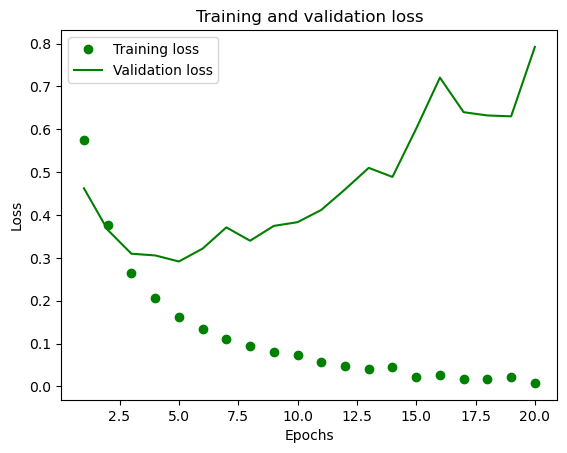

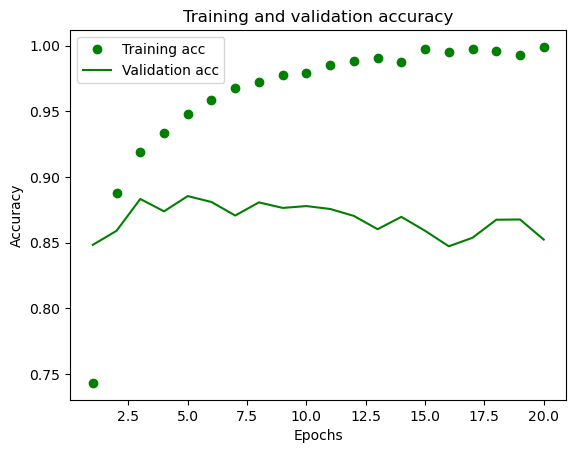

In [34]:
loss_val3 = history_dict_3["loss"]
val_loss_val3 = history_dict_3["val_loss"]
epochs3 = range(1, len(loss_val3) + 1)
plt.plot(epochs3, loss_val3, "go", label="Training loss")
plt.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy3 = history_dict_3["accuracy"]
val_accuracy3 = history_dict_3["val_accuracy"]
plt.plot(epochs3, accuracy3, "go", label="Training acc")
plt.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
model_3_layers = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 9ms/step - loss: 0.4968 - accuracy: 0.7934
Epoch 2/3
49/49 [==============================] - 2s 48ms/step - loss: 0.2845 - accuracy: 0.9005
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2894 - accuracy: 0.8841


In [36]:
print(results_3_layers)

[0.28939756751060486, 0.8840799927711487]


In [37]:
model_3_layers.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.31445858],
       [0.99829286],
       [0.9512224 ],
       ...,
       [0.14704221],
       [0.13247192],
       [0.5787477 ]], dtype=float32)

The accuracy of the model does not rise significantly as the number of layers increases. However, compared to the other two, the three-layer model is more accurate.
Choosing how many units to include in the hidden layers is a crucial step in creating the overall architecture of your neural network.
These layers have a significant impact on the result even though they don't immediately interact with the outside environment.

Building Neural Network with 32 units & 3 layers.

In [38]:


model_32_units = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val_32 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_32 = y_train[:10000]
partial_y_train = y_train[10000:]


history_32_units = model_32_units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_32, y_val_32))


Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5101 - accuracy: 0.7730 - val_loss: 0.3762 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2965 - accuracy: 0.8904 - val_loss: 0.2874 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2192 - accuracy: 0.9214 - val_loss: 0.2991 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1753 - accuracy: 0.9369 - val_loss: 0.2813 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1440 - accuracy: 0.9491 - val_loss: 0.3656 - val_accuracy: 0.8595
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1168 - accuracy: 0.9601 - val_loss: 0.3131 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0992 - accuracy: 0.9654 - val_loss: 0.3384 - val_accuracy: 0.8790
Epoch 8/20
30

In [39]:
history_dict_32 = history_32_units.history
history_dict_32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

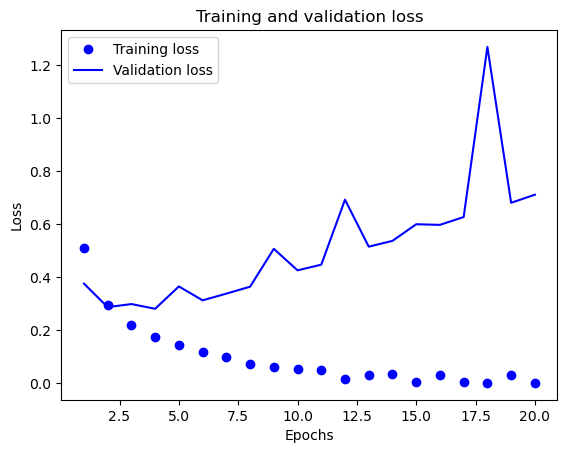

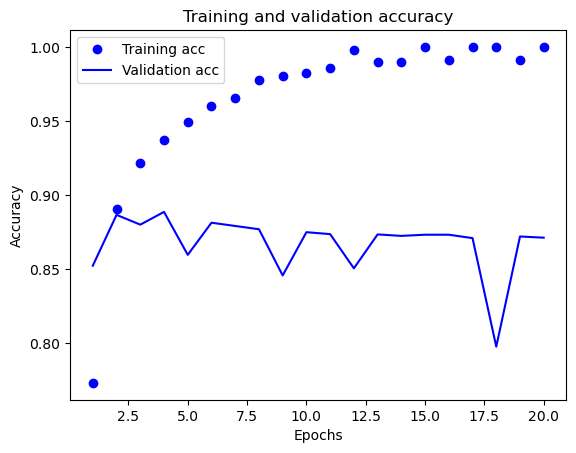

In [40]:
loss_value_32 = history_dict_32["loss"]
val_loss_value_32 = history_dict_32["val_loss"]
epochs_32 = range(1, len(loss_value_32) + 1)
plt.plot(epochs_32, loss_value_32, "bo", label="Training loss")
plt.plot(epochs_32, val_loss_value_32, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_32 = history_dict_32["accuracy"]
val_accuracy_32 = history_dict_32["val_accuracy"]
plt.plot(epochs_32, accuracy_32, "bo", label="Training acc")
plt.plot(epochs_32, val_accuracy_32, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
history_32_units = model_32_units.fit(x_train, y_train, epochs=3, batch_size=512)
results_32_units = model_32_units.evaluate(x_test, y_test)
results_32_units

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.2154 - accuracy: 0.9449
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1164 - accuracy: 0.9638
Epoch 3/3
782/782 [==============================] - 1s 1ms/step - loss: 0.4107 - accuracy: 0.8665


[0.41070374846458435, 0.8665199875831604]

In [42]:
model_32_units.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.02642841],
       [0.9999992 ],
       [0.34103748],
       ...,
       [0.15327108],
       [0.02567562],
       [0.96801573]], dtype=float32)

 validation set accuracy = 86.8%

 Having the model with 64 units & 2 layers. 

In [43]:
model_64_units = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_64 = y_train[:10000]
partial_y_train = y_train[10000:]

history_64 = model_64_units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64, y_val_64))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5083 - accuracy: 0.7513 - val_loss: 0.4499 - val_accuracy: 0.7920
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3016 - accuracy: 0.8817 - val_loss: 0.3075 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2241 - accuracy: 0.9156 - val_loss: 0.3029 - val_accuracy: 0.8762
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1855 - accuracy: 0.9302 - val_loss: 0.3023 - val_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1482 - accuracy: 0.9461 - val_loss: 0.3512 - val_accuracy: 0.8652
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1225 - accuracy: 0.9565 - val_loss: 0.3060 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1017 - accuracy: 0.9658 - val_loss: 0.3244 - val_accuracy: 0.8799
Epoch 8/20
30

In [44]:
history_dict_64 = history_64.history
history_dict_64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

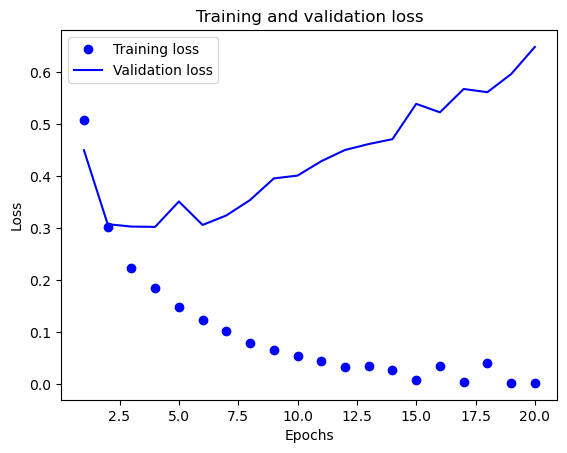

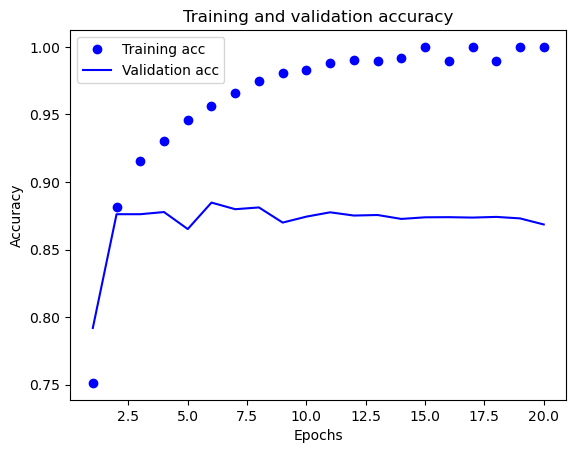

In [45]:
loss_value64 = history_dict_64["loss"]
val_loss_value64 = history_dict_64["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plt.plot(epochs_64, loss_value64, "bo", label="Training loss")
plt.plot(epochs_64, val_loss_value64, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
accuracy_64 = history_dict_64["accuracy"]
val_accuracy_64 = history_dict_64["val_accuracy"]
plt.plot(epochs_64, accuracy_64, "bo", label="Training acc")
plt.plot(epochs_64, val_accuracy_64, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
history_64 = model_64_units.fit(x_train, y_train, epochs=3, batch_size=512)
results_64_units = model_64_units.evaluate(x_test, y_test)
results_64_units

Epoch 1/3
49/49 [==============================] - 1s 16ms/step - loss: 0.1868 - accuracy: 0.9446
Epoch 2/3
49/49 [==============================] - 1s 16ms/step - loss: 0.1013 - accuracy: 0.9689
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8662


[0.41973182559013367, 0.866159975528717]

In [47]:
model_64_units.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.00579347],
       [0.99999976],
       [0.29264408],
       ...,
       [0.01205084],
       [0.00690441],
       [0.98704123]], dtype=float32)

 validation set accuracy = 86.61%

Training the model with 128 units & 3 layers

In [48]:

model_128units = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128units.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_128 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_128 = y_train[:10000]
partial_y_train = y_train[10000:]

history_128 = model_128units.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_128, y_val_128))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5338 - accuracy: 0.7331 - val_loss: 0.3382 - val_accuracy: 0.8636
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3076 - accuracy: 0.8735 - val_loss: 0.4637 - val_accuracy: 0.7966
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2211 - accuracy: 0.9131 - val_loss: 0.2917 - val_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1683 - accuracy: 0.9347 - val_loss: 0.4922 - val_accuracy: 0.8225
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1454 - accuracy: 0.9447 - val_loss: 0.3377 - val_accuracy: 0.8722
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1064 - accuracy: 0.9612 - val_loss: 0.3156 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.3404 - val_accuracy: 0.8824
Epoch 8/20
30

In [49]:
history_dict_128 = history_128.history
history_dict_128.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

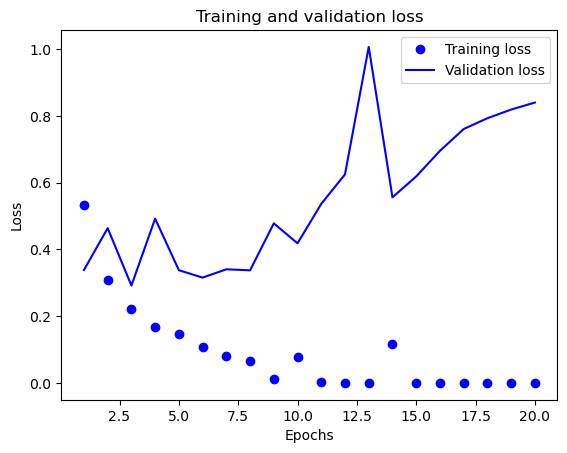

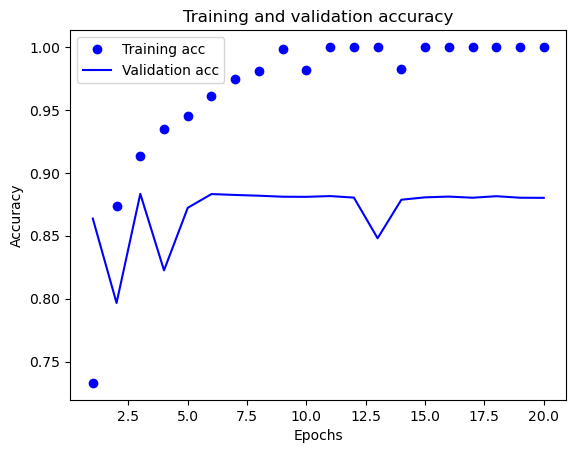

In [50]:
loss_value128 = history_dict_128["loss"]
val_loss_value128 = history_dict_128["val_loss"]
epochs_128 = range(1, len(loss_value128) + 1)
plt.plot(epochs_128, loss_value128, "bo", label="Training loss")
plt.plot(epochs_128, val_loss_value128, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
accuracy_128 = history_dict_128["accuracy"]
val_accuracy_128 = history_dict_128["val_accuracy"]
plt.plot(epochs_128, accuracy_128, "bo", label="Training acc")
plt.plot(epochs_128, val_accuracy_128, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
history_128 = model_128units.fit(x_train, y_train, epochs=2, batch_size=512)
results_128_units = model_128units.evaluate(x_test, y_test)
results_128_units

Epoch 1/2
49/49 [==============================] - 1s 22ms/step - loss: 0.2075 - accuracy: 0.9439
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.8289


[0.5526227355003357, 0.8288800120353699]

In [52]:
model_128units.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.16877271],
       [0.9999999 ],
       [0.9679769 ],
       ...,
       [0.13840285],
       [0.0488333 ],
       [0.99154335]], dtype=float32)

MSE Loss Function model with 16 units and 3-layers

In [53]:

MSE_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
x_val_MSE = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_MSE = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit

history_MSE = MSE_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_MSE, y_val_MSE))

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.2014 - accuracy: 0.7415 - val_loss: 0.1447 - val_accuracy: 0.8497
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1153 - accuracy: 0.8779 - val_loss: 0.1036 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0806 - accuracy: 0.9103 - val_loss: 0.0902 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0650 - accuracy: 0.9251 - val_loss: 0.0853 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0529 - accuracy: 0.9402 - val_loss: 0.0912 - val_accuracy: 0.8757
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0457 - accuracy: 0.9497 - val_loss: 0.0833 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0399 - accuracy: 0.9541 - val_loss: 0.0874 - val_accuracy: 0.8854
Epoch 8/20
30

In [54]:
historydict_MSE = history_MSE.history
historydict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

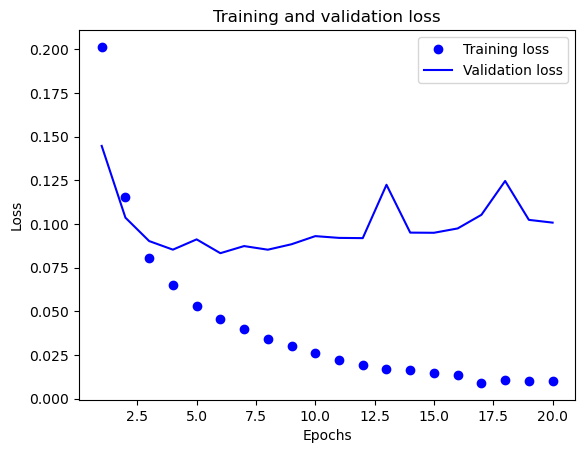

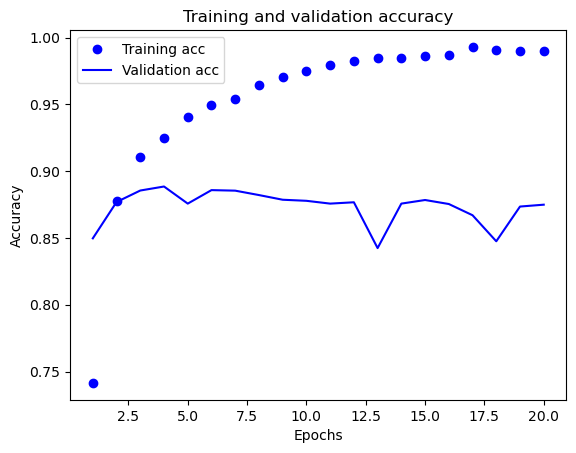

In [55]:
import matplotlib.pyplot as plt
loss_value_MSE = historydict_MSE["loss"]
val_loss_value_MSE = historydict_MSE["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE) + 1)
plt.plot(epochs_MSE, loss_value_MSE, "bo", label="Training loss")
plt.plot(epochs_MSE, val_loss_value_MSE, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_MSE = historydict_MSE["accuracy"]
val_acc_MSE = historydict_MSE["val_accuracy"]
plt.plot(epochs_MSE, acc_MSE, "bo", label="Training acc")
plt.plot(epochs_MSE, val_acc_MSE, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [56]:
MSE_model.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = MSE_model.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0464 - accuracy: 0.9442
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0360 - accuracy: 0.9594
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9654
Epoch 4/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 0.9700
Epoch 5/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.9773
Epoch 6/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 0.9767
Epoch 7/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.9794
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1121 - accuracy: 0.8660


[0.1121000275015831, 0.8659600019454956]

In [57]:
MSE_model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.00558383],
       [0.99996334],
       [0.20271574],
       ...,
       [0.03060965],
       [0.00339151],
       [0.969499  ]], dtype=float32)

In [58]:
 
tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]


historytanh_model = tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1660 - accuracy: 0.7894 - val_loss: 0.1257 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1011 - accuracy: 0.8934 - val_loss: 0.1003 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0801 - accuracy: 0.9128 - val_loss: 0.0912 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0671 - accuracy: 0.9272 - val_loss: 0.0931 - val_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0582 - accuracy: 0.9383 - val_loss: 0.0867 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0526 - accuracy: 0.9444 - val_loss: 0.0866 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0470 - accuracy: 0.9515 - val_loss: 0.0861 - val_accuracy: 0.8860
Epoch 8/20
30

In [59]:
historydict_tanh = historytanh_model.history
historydict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

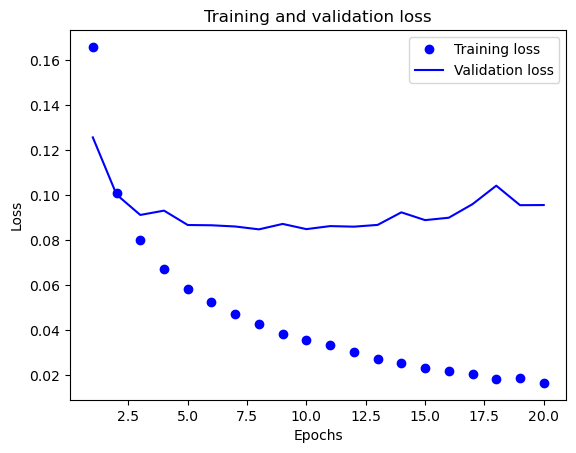

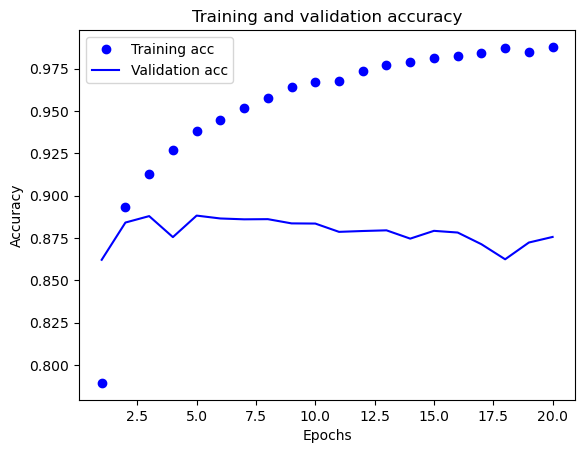

In [60]:
loss_value_tanh= historydict_tanh["loss"]
val_loss_value_tanh = historydict_tanh["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh) + 1)
plt.plot(epochs_tanh, loss_value_tanh, "bo", label="Training loss")
plt.plot(epochs_tanh, val_loss_value_tanh, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_tanh = historydict_tanh["accuracy"]
val_acc_tanh = historydict_tanh["val_accuracy"]
plt.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plt.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [61]:
tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0474 - accuracy: 0.9426
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.9545
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0361 - accuracy: 0.9604
Epoch 4/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0329 - accuracy: 0.9646
Epoch 5/8
49/49 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9682
Epoch 6/8
49/49 [==============================] - 0s 8ms/step - loss: 0.0285 - accuracy: 0.9707
Epoch 7/8
49/49 [==============================] - 0s 8ms/step - loss: 0.0274 - accuracy: 0.9718
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.1055 - accuracy: 0.8667


[0.10546080768108368, 0.8667200207710266]

Adam Operator with 16 units and 3-layers

In [62]:


adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_adam = x_train[:10000]
partial_x_train = x_train[10000:]

y_adam = y_train[:10000]
partial_y_train = y_train[10000:]
 

historyadam = adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_adam, y_adam))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5943 - accuracy: 0.7009 - val_loss: 0.4720 - val_accuracy: 0.8399
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3528 - accuracy: 0.9006 - val_loss: 0.3171 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2131 - accuracy: 0.9379 - val_loss: 0.2999 - val_accuracy: 0.8826
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1461 - accuracy: 0.9574 - val_loss: 0.2911 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1037 - accuracy: 0.9735 - val_loss: 0.3135 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0764 - accuracy: 0.9840 - val_loss: 0.3481 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0561 - accuracy: 0.9909 - val_loss: 0.3812 - val_accuracy: 0.8771
Epoch 8/20
30

In [63]:
historydict_adam = historyadam.history
historydict_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

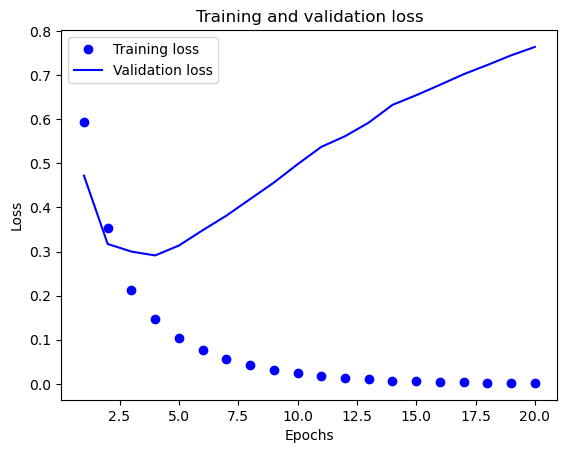

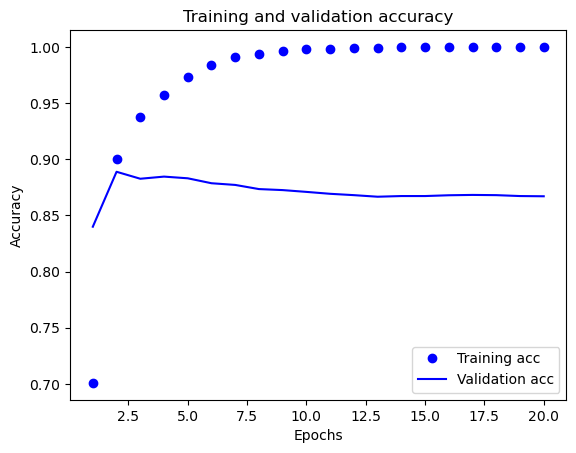

In [64]:
loss_value_adam = historydict_adam["loss"]
val_loss_value_adam = historydict_adam["val_loss"]
epochs_adam = range(1, len(loss_value_adam) + 1)
plt.plot(epochs_adam, loss_value_adam, "bo", label="Training loss")
plt.plot(epochs_adam, val_loss_value_adam, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_adam = historydict_adam["accuracy"]
val_acc_adam = historydict_adam["val_accuracy"]
plt.plot(epochs_adam, acc_adam, "bo", label="Training acc")
plt.plot(epochs_adam, val_acc_adam, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [65]:
adam.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = adam.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2495 - accuracy: 0.9341
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1245 - accuracy: 0.9597
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.0872 - accuracy: 0.9760
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.5099 - accuracy: 0.8590


[0.5098975896835327, 0.8590400218963623]

Regularization model with 16 units and 2-layers

In [66]:
#Regularization

from tensorflow.keras import regularizers
regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_regularization = regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_regularization = history_regularization.history
historydict_regularization.keys()

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5816 - accuracy: 0.7754 - val_loss: 0.4661 - val_accuracy: 0.8463
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3823 - accuracy: 0.8921 - val_loss: 0.3660 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3036 - accuracy: 0.9137 - val_loss: 0.3462 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2601 - accuracy: 0.9293 - val_loss: 0.3370 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2350 - accuracy: 0.9372 - val_loss: 0.3285 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2129 - accuracy: 0.9483 - val_loss: 0.3339 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2022 - accuracy: 0.9500 - val_loss: 0.3437 - val_accuracy: 0.8843
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

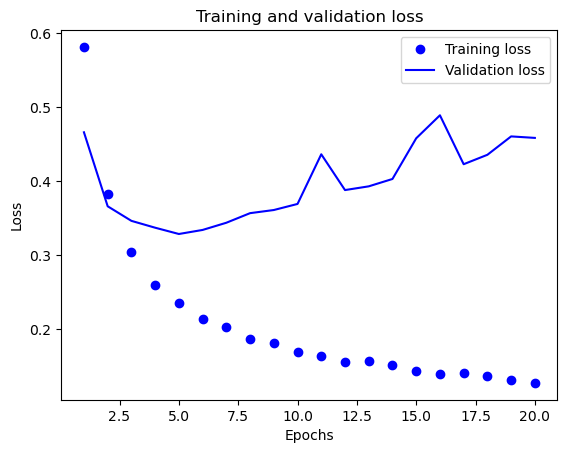

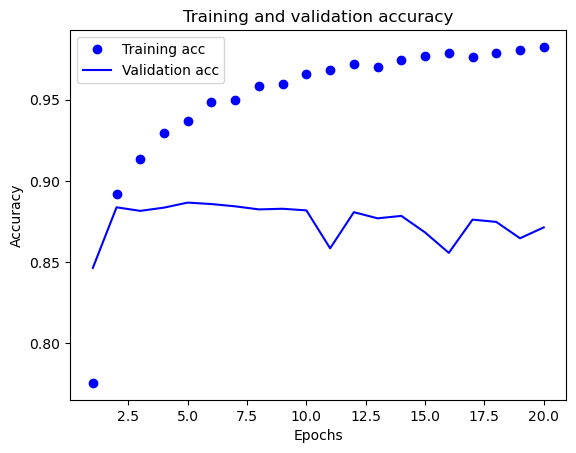

In [67]:
loss_valu = historydict_regularization["loss"]
val_loss_value_r = historydict_regularization["val_loss"]
epochs_r = range(1, len(loss_valu) + 1)
plt.plot(epochs_r, loss_valu, "bo", label="Training loss")
plt.plot(epochs_r, val_loss_value_r, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc_r = historydict_regularization["accuracy"]
val_acc_r = historydict_regularization["val_accuracy"]
plt.plot(epochs_r, acc_r, "bo", label="Training acc")
plt.plot(epochs_r, val_acc_r, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [68]:
regularization.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization = regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/8
49/49 [==============================] - 0s 8ms/step - loss: 0.2479 - accuracy: 0.9390
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2063 - accuracy: 0.9488
Epoch 3/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1902 - accuracy: 0.9538
Epoch 4/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1833 - accuracy: 0.9566
Epoch 5/8
49/49 [==============================] - 0s 8ms/step - loss: 0.1770 - accuracy: 0.9587
Epoch 6/8
49/49 [==============================] - 0s 8ms/step - loss: 0.1661 - accuracy: 0.9642
Epoch 7/8
49/49 [==============================] - 0s 8ms/step - loss: 0.1684 - accuracy: 0.9610
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.4589 - accuracy: 0.8604


[0.45891207456588745, 0.8603600263595581]

Dropout function with 16 units and 3-layers

In [69]:
#Dropout
from tensorflow.keras import regularizers
Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Dropout = Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_Dropout = history_Dropout.history
historydict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 3s 31ms/step - loss: 0.6758 - accuracy: 0.5643 - val_loss: 0.5848 - val_accuracy: 0.8217
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6064 - accuracy: 0.6571 - val_loss: 0.4974 - val_accuracy: 0.8449
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5403 - accuracy: 0.7269 - val_loss: 0.4187 - val_accuracy: 0.8760
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4839 - accuracy: 0.7699 - val_loss: 0.3714 - val_accuracy: 0.8712
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.4322 - accuracy: 0.8101 - val_loss: 0.3127 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3801 - accuracy: 0.8390 - val_loss: 0.2981 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3397 - accuracy: 0.8645 - val_loss: 0.2807 - val_accuracy: 0.8878
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

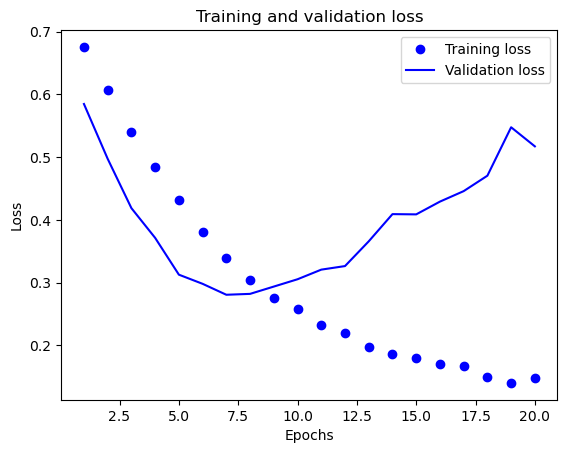

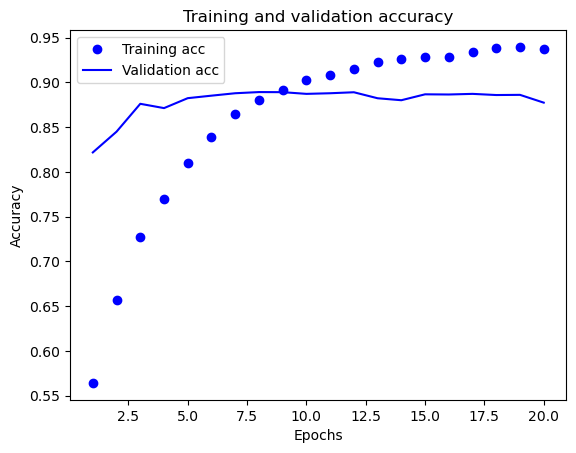

In [70]:
loss_val = historydict_Dropout["loss"]
val_loss_val_d = historydict_Dropout["val_loss"]
epochs_d = range(1, len(loss_val) + 1)
plt.plot(epochs_d, loss_val, "bo", label="Training loss")
plt.plot(epochs_d, val_loss_val_d, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_d = historydict_Dropout["accuracy"]
val_acc_d = historydict_Dropout["val_accuracy"]
plt.plot(epochs_d, acc_d, "bo", label="Training acc")
plt.plot(epochs_d, val_acc_d, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [71]:
Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 10ms/step - loss: 0.3101 - accuracy: 0.8896
Epoch 2/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2730 - accuracy: 0.8989
Epoch 3/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2413 - accuracy: 0.9030
Epoch 4/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2369 - accuracy: 0.9089
Epoch 5/8
49/49 [==============================] - 0s 9ms/step - loss: 0.2126 - accuracy: 0.9103
Epoch 6/8
49/49 [==============================] - 0s 10ms/step - loss: 0.2137 - accuracy: 0.9134
Epoch 7/8
49/49 [==============================] - 0s 9ms/step - loss: 0.1975 - accuracy: 0.9182
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.4681 - accuracy: 0.8667


[0.46809616684913635, 0.8666800260543823]

Training model with hyper tuned parameters with 32 units and 3 -layers

In [72]:
#Training model with hyper tuned parameters

from tensorflow.keras import regularizers
Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hyper = Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHyper = history_Hyper.history
history_dictHyper.keys()

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.2472 - accuracy: 0.5963 - val_loss: 0.1986 - val_accuracy: 0.8244
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1957 - accuracy: 0.7404 - val_loss: 0.1360 - val_accuracy: 0.8639
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1507 - accuracy: 0.8173 - val_loss: 0.1064 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1240 - accuracy: 0.8589 - val_loss: 0.0994 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1041 - accuracy: 0.8861 - val_loss: 0.1013 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0904 - accuracy: 0.9049 - val_loss: 0.1053 - val_accuracy: 0.8800
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0799 - accuracy: 0.9229 - val_loss: 0.1009 - val_accuracy: 0.8875
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

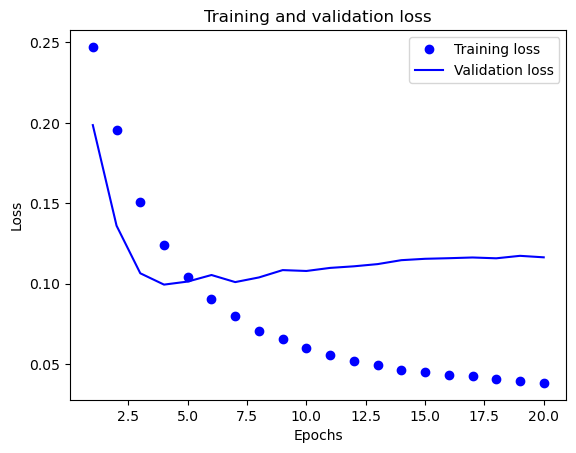

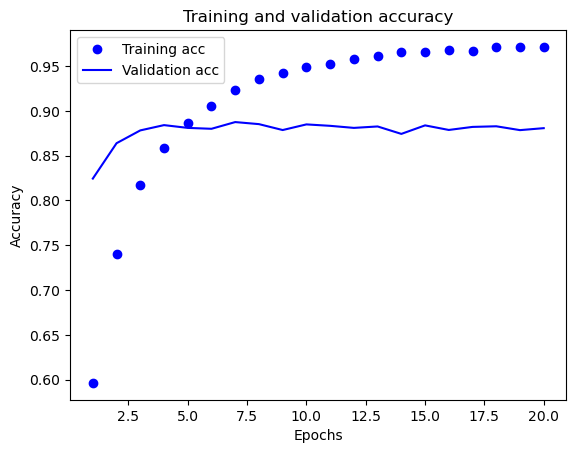

In [73]:
loss_va_h = history_dictHyper["loss"]
val_loss_va_h = history_dictHyper["val_loss"]
epochs_h = range(1, len(loss_va_h) + 1)
plt.plot(epochs_h, loss_va_h, "bo", label="Training loss")
plt.plot(epochs_h, val_loss_va_h, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc_h = history_dictHyper["accuracy"]
val_acc_h = history_dictHyper["val_accuracy"]
plt.plot(epochs_h, acc_h, "bo", label="Training acc")
plt.plot(epochs_h, val_acc_h, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [74]:
Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0724 - accuracy: 0.9312
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0663 - accuracy: 0.9375
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0624 - accuracy: 0.9419
Epoch 4/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0581 - accuracy: 0.9473
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0543 - accuracy: 0.9520
Epoch 6/8
49/49 [==============================] - 1s 10ms/step - loss: 0.0525 - accuracy: 0.9532
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0508 - accuracy: 0.9560
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.1139 - accuracy: 0.8821


[0.1138567253947258, 0.8820800185203552]

In [75]:
#Summary
Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
Models_Loss
Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

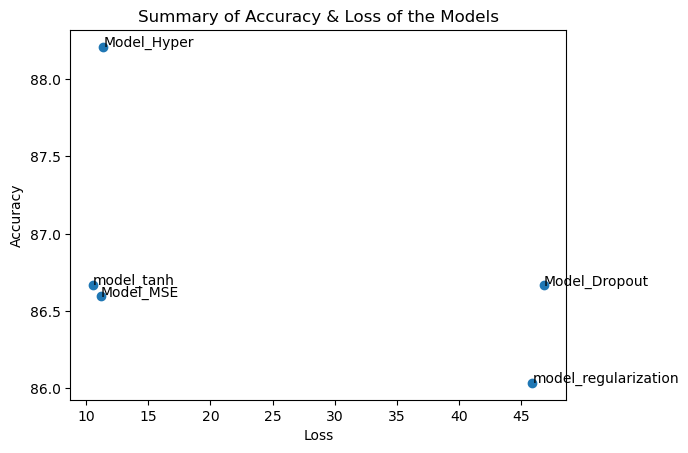

In [76]:
#Compilation

fig, ax = plt.subplots()
ax.scatter(Models_Loss,Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (Models_Loss[i],Models_Accuracy[i] ))
plt.title("Summary of Accuracy & Loss of the Models")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

First, data had to be imported, review analysis settings had to be specified, and a simple neural network with one 16-unit hidden layer was constructed using binary crossentropy and relu activation. In order to improve model performance, more research was conducted. This included changing the number of units per layer (32, 64, 128) and the number of hidden layers (one to three). While accuracy was generally increased by increasing the number of concealed units, overfitting was a possibility. Furthermore, there was no discernible difference in the performance of the model when mean squared error (MSE) loss was substituted for binary crossentropy. Overall, the results indicated that while tweaking the architecture and parameters might improve accuracy, selecting the right loss functions and avoiding overfitting required considerable thought.